(sec:fft)=
# Fast Fourier Transform

An remarkable algorithm was developed in 19 century but not very popular until modern computers appeared in 1960's.
It allows us to perform Fourier transform with only $N \log_2 N$ operations instead of $N^2$.  When $N=1024$,
$N \log_2 N = 10240$ where as $N^2 \approx 1 \times 10^{6}$ which is 100 times large. The saving is even bigger for a larger $N$.
The algorithm, known as Fast Fourier Transform (FFT), is very popular and widely used in a variety of applications in science, engineering and beyond.\footnote{FFT is built in many computational environments such as MATLAB.  FFT libraries are available for almost any computer language, among them awaard-winning Fast Fourier Transform in the West (FFTW) is popular and available for a variety of languages including C/C++, Fortran, Python, Java, etc.  See [www.fftw.org](https://www.fftw.org).)

The FFT utilizes the structure the matrix $\mathcal{F}$ {eq}`eq:DFT_matrix`.  Consider $N=8$ for example, the matrix is given by

$$
\mathcal{F} = \frac{T}{8}
\begin{bmatrix}
1 &               1 &               1 &               1 &               1 &               1 &               1 &               1 \\
1 &  e^{i  \pi/4} & e^{i  2\pi/4} & e^{i  3\pi/4} & e^{i  4\pi/4} & e^{i  5\pi/4} & e^{i  6\pi/4} & e^{i  7\pi/4} \\
1 &  e^{i 2\pi/4} & e^{i  4\pi/4} & e^{i  6\pi/4} & e^{i  8\pi/4} & e^{i 10\pi/4} & e^{i 12\pi/4} & e^{i 14\pi/4} \\
1 &  e^{i 3\pi/4} & e^{i  6\pi/4} & e^{i  9\pi/4} & e^{i 12\pi/4} & e^{i 15\pi/4} & e^{i 18\pi/4} & e^{i 21\pi/4} \\
1 &  e^{i 4\pi/4} & e^{i  8\pi/4} & e^{i 12\pi/4} & e^{i 16\pi/4} & e^{i 20\pi/4} & e^{i 24\pi/4} & e^{i 28\pi/4} \\
1 &  e^{i 5\pi/4} & e^{i 10\pi/4} & e^{i 15\pi/4} & e^{i 20\pi/4} & e^{i 25\pi/4} & e^{i 30\pi/4} & e^{i 35\pi/4} \\
1 &  e^{i 6\pi/4} & e^{i 12\pi/4} & e^{i 18\pi/4} & e^{i 24\pi/4} & e^{i 30\pi/4} & e^{i 36\pi/4} & e^{i 42\pi/4} \\
1 &  e^{i 7\pi/4} & e^{i 14\pi/4} & e^{i 21\pi/4} & e^{i 28\pi/4} & e^{i 35\pi/4} & e^{i 42\pi/4} & e^{i 49\pi/4} 
\end{bmatrix}
$$(eq:FFTmatrix1)

Evaluating the expinential functions, it can be written in an explicite expression

$$
\begin{bmatrix}
1 &               1 &               1 &               1 &               1 &               1 &               1 &               1 \\
1 & e^{ i  \pi/4} &               i &-e^{-i  \pi/4} &              -1 &-e^{ i  \pi/4} &              -i & e^{-i  \pi/4} \\
1 &               i &              -1 &              -i &               1 &               i &              -1 &              -i \\
1 &-e^{-i  \pi/4} &              -i & e^{ i  \pi/4} &              -1 & e^{-i  \pi/4} &               i &-e^{ i  \pi/4} \\
1 &              -1 &               1 &              -1 &               1 &              -1 &               1 &              -1 \\
1 &-e^{ i  \pi/4} &               i & e^{-i  \pi/4} &              -1 & e^{ i  \pi/4} &              -i &-e^{-i  \pi/4} \\
1 &              -i &              -1 &               i &               1 &              -i &              -1 &               i \\
1 & e^{-i  \pi/4} &              -i &-e^{ i  \pi/4} &              -1 &-e^{-i  \pi/4} &               i & e^{ i  \pi/4} 
\end{bmatrix}
$$(eq:FFTmatrix2)

where the explixite values $e^{0}=1$, $e^{i \pi}=-1$, and $e^{\pm i \pi/2} = \pm i$ are used except for $e^{\pm \pi/4}$.  

You can see easily that matrix {eq}`eq:FFTmatrix2` is much simpler than Matrix {eq}`eq:FFTmatrix1`. You notice that many matrix elements share the same value. A simple trick reveals the simplicity of the transformation matrix. First, we reorder the elements of the vector in a ``magic'' order:

$$
\mathbf{f}^\prime = 
\begin{bmatrix}
f_0 \\ f_4 \\ f_2\\ f_6\\ f_1\\ f_5\\ f_3\\ f_7 
\end{bmatrix}, \qquad \text{and}
\qquad
\tilde{\mathbf{f}}^\prime = 
\begin{bmatrix}
\tilde{f}_0 \\ \tilde{f}_4 \\ \tilde{f}_2\\ \tilde{f}_6\\ \tilde{f}_1\\ \tilde{f}_5\\ \tilde{f}_3\\ f_7
\end{bmatrix}
$$

and reorder the columns and rows of {eq}`eq:FFTmatrix2` accordingly.  Then, the matrix becomes

$$
\mathcal{F}^\prime = \frac{T}{8}
\begin{bmatrix}
1 &  1 &               1  &                1 &                1 &                1 &                1 &                1 \\
1 &  1 &               1  &                1 &               -1 &               -1 &               -1 &               -1 \\
1 &  1 &              -1  &               -1 &                i &                i &               -i &               -i \\
1 &  1 &              -1  &               -1 &               -i &               -i &                i &                i \\
1 & -1 &               i  &               -i &  e^{ i  \pi/4} & -e^{ i  \pi/4} & -e^{-i  \pi/4} &  e^{-i  \pi/4} \\
1 & -1 &               i  &               -i & -e^{ i  \pi/4} &  e^{ i  \pi/4} &  e^{-i  \pi/4} & -e^{-i  \pi/4} \\
1 & -1 &              -i  &                i & -e^{-i  \pi/4} &  e^{-i  \pi/4} &  e^{ i  \pi/4} & -e^{ i  \pi/4} \\
1 & -1 &              -i  &                i &  e^{-i  \pi/4} & -e^{-i  \pi/4} & -e^{ i  \pi/4} &  e^{ i  \pi/4} 
\end{bmatrix}
$$

Notice the patterns of the matrix elements.

Writing  $\tilde{\mathbf{f}}^\prime=\mathcal{F}^\prime \mathbf{f}^\prime$ explicitly,

$$
\begin{eqnarray}
\tilde{f}_0 &=& [(f_0+f_4) + (f_2+f_6)] + [(f_1+f_5) + (f_3+f_7)] \\
\tilde{f}_4 &=& [(f_0+f_4) + (f_2+f_6)] - [(f_1+f_5) + (f_3+f_7)] \\
\tilde{f}_2 &=& [(f_0+f_4) - (f_2+f_6)] +i[(f_1+f_5) - (f_3+f_7)] \\
\tilde{f}_6 &=& [(f_0+f_4) - (f_2+f_6)] -i[(f_1+f_5) - (f_3+f_7)] \\
\tilde{f}_1 &=& [(f_0-f_4) + i(f_2-f_6)] + [e^{ i\pi/4} (f_1-f_5) - e^{-i\pi/4} (f_3-f_7)]\\
\tilde{f}_5 &=& [(f_0-f_4) + i(f_2-f_6)] - [e^{ i\pi/4} (f_1-f_5) - e^{-i\pi/4} (f_3-f_7)]\\
\tilde{f}_3 &=& [(f_0-f_4) - i(f_2-f_6)] - [e^{-i\pi/4} (f_1-f_5) - e^{ i\pi/4} (f_3-f_7)]\\
\tilde{f}_7 &=& [(f_0-f_4) - i(f_2-f_6)] + [e^{-i\pi/4} (f_1-f_5) - e^{ i\pi/4} (f_3-f_7)],
\end{eqnarray}
$$

we clearly see the regularity in the matrix.
Now look at the additions in the regular parentheses $(\cdots)$.  Many additions are identical.  In fact, there are 32 additions but only 8 different ones. We can reduce the computation by factor 4.  Furthermore, the additions inside the square bracket $[\cdots]$ are duplicated in the following line. Hence, we reduce the  calculation by factor 2.  For a large matrix we can save a lot of computation time.  

The permutation of rows and columns gives us the clear picture of this redundant additions.  How do we determine the permutation?  It turns out to be very simple. Express the element indexes in binary, e.g. $3=011$, then reverse the order of the bits, $011 \rightarrow 110$ which is $7$.  Then, we swap column 3 and 7.  Figure \ref{fig:bit_reversed_order} illustrates the bit reversed order.

The above algorithm of FFT works only when $N=2^k$.  In modern FFT libraries other values of $N$ can be used.  However, the power of 2 gets the best performance.  If we have a data set whose size is not the power of two, we can just add 0 to the data set until the total number of data becomes the power of 2.  This zero padding does not cause a problem since the data outside the bounds is already assumed to be zero.

```{figure} bit_reversed_order.png
:name: fig:bit_reversed_order
```

## Remarks on the use of canned routines

The detail use of the FFT package strongly depends on their implementation.  It is important to read the manual carefully before using it. Numpy package includes FFT package [numpy.fft](https://numpy.org/doc/stable/reference/routines.fft.html), which is based on
Cooley and Tukey algorithm{cite}`Cooley1965` (See also Numerical Recipes{cite}`numerical_recipes`.) 

The most popular FFT package is FFTW{cite}`Frigo1997` which earned J. H. Wilkinson Prize for Numerical Software in 1999. It is written in C language.  A Python package 
[PyFFTW](https://pypi.org/project/pyFFTW/) is a wrapper to FFTW.

In this lecture, we use ```numpy.fft``` which have build-in functions ```fft``` for forward FFT and ```ifft``` for inverse FFT. However, as we discussed earlier the definition of  "forward" and "inverse" is not unique.  We need to find what they actually compute. In ```numpy```   ```fft``` computes

$$
F_m = \sum_{n=0}^{N-1} f_n \exp(-i \frac{2\pi\, m\, n}{N})
$$(eq:numpy_fft)

and ```ifft```

$$
f_n = \frac{1}{N} \sum_{m=0}^{N-1} F_m \exp(i \frac{2\pi\, n\, m}{N})
$$(eq:numpy_ifft)

Compare these definitions with Eqs {eq}`eq:DFT`, ```fft``` corresponds to our inverse Fourier transform and ```ifft``` to our forward Fourier transform.  Notice also that neither ```fft``` or ```ifft``` has prefactor $T$ or $1/T$.  we must multiply an appropriate prefactor by ourselves.  Furthermore, 
we must prepare the input data set $\{f_m\}$ suitable for their application and converts output data $\{F_k\}$ to a suitable form by reordering. Some key points we need to know are given below.

_Forward or Backward Transformation_

Apart from the factor $T/N$ and $1/T$, the difference between forward and backward transformation is the sign in the exponent. It is just the convention issue.  FFTW, used $\me^{-i\omega t}$ as forward, which is opposite to ours.    My forward transformation may be your inverse transformation. We just have to use a routine which has a desired sign.   Numpy use the same convention as FFTW.

_Prefactor in front of the Summation_

```numpy.fft``` does not multiply $T$ nor $1/T$.  It is up to us to multiply an appropriate prefactor.  Note that the output of the ```fft``` and ```ifft``` does satisfy the Fourier theorem sin $T \times 1/T = 1$.

_Input/Output Format: Bit Reversed or Not_

Most FFT routines carry out the bit reversal permutation internally. So, we don't have to do it by ourselves.  However, the order of output depends on the FFT routines. Some FFT routines return the results in the original order but others in the bit reversed order. Advanced packages allow the users to specify the output order.  Why do we want the result in bit reversed order? In some cases, we repeat FFT many times but we need only the final output.  Therefore, there is no need to change the order back and forth every time.  If the bit-reversed order is kept during the repeated FFT, computing time is significantly saved. By default, ```numpy.fft`` returns the data in the regular order.

_Input/Output format: Periodicity_

Even when the output is not in the bit reversed order, the order of input/output data is often very confusing.  Recall that we replaced $\sum_{n=-N/2}^{N/2-1}$ with $\sum_{n=0}^{N-1}$.
FFT assumes that $t=0, \Delta t, 2\Delta t, \cdots, (N-1)\Delta t$ and that the function values are stored in this order. There is no negative $t$!.  Suppose that we have a function data $f_n$ for $n=0, \cdots, N-1$ with $t_n = (n-N/2) \Delta t$.  Although $t$ begins with a negative value $-N/2$, FFT doesn't care about it and assume that the first data $f_0$ is at $t=0$. That is obviously wrong.  Therefore, we need to change the order of the input data.  Since the functions in DFT are periodic, we can add the period $T$ to $t$ without changing the function value.  For $t<0$, use $\mathbf{f}(t+T)$. Now the function is evaluated at positive time only.  In summary, the input data must be reordered as follows.

$$
\mathbf{f}^\text{raw data}=
\begin{bmatrix}
f_0\\
\vdots\\
f_{N/2}\\
f_{N/2+1}\\
\vdots\\
f_{N-1}
\end{bmatrix} \quad \Longrightarrow \quad
\mathbf{f}^\text{input} =
\begin{bmatrix}
f_{N/2+1} \\
\vdots \\
f_{N-1} \\
f_0\\
\vdots\\
f_{N/2}
\end{bmatrix}
$$

Similarly, the order of the output data is shifted in the same way as the input order.
Usually, you want to get a function $\tilde{f}(\omega)$ from $-\Omega/2$ to $\Omega/2$.  The output from FFT is not like that.  The first half of the data is for $\omega = 0$ to $\omega=\Omega/2$ and the latter half begins with $\omega=-\Omega/2$   to $\omega=-\Delta \omega$.  The user must reordered the output before plotting it as following:

$$
\tilde{\mathbf{f}}^\text{output} = 
\begin{bmatrix}
\tilde{f}_0\\
\vdots\\
\tilde{f}_{N/2}\\
\tilde{f}_{N/2+1}\\
\vdots\\
\tilde{f}_{N-1}
\end{bmatrix} \quad \Longrightarrow \quad
\tilde{\mathbf{f}}^\text{plot} =
\begin{bmatrix}
\tilde{f}_{N/2+1}\\
\vdots\\
\tilde{f}_{N-1}\\
\tilde{f}_{0}\\
\vdots\\
\tilde{f}_{N/2}
\end{bmatrix}
$$

```Numpy.fft``` provide functions ```fftshift``` and ```ifftshift``` to carryout the above transformation.  The following example explains how to prepare the input data and recover the output you need.


**Example** {numref}`%s <sec:fft>`.1    Foureir Transform of a Gaussian Function]

Let us compute the Fourier transform of a normalized Gaussian function

$$
f(t) = \frac{1}{\sqrt{\pi}} e^{-t^2}.
$$

The analytic solution is given by

$$
\tilde{f}(\omega) = \frac{1}{\sqrt{\pi}} \int_{-\infty}^\infty e^{-t^2} e^{i \omega t} d{t}  = e^{-\omega^2/4}
$$

First, we have to decide the parameter values. $T=50$ and $N=1024=2^{10}$ makes time resolution $\Delta t \approx 0.05$ fine enough. The function value at the bound $f(\pm T/2) \approx 10^{-272}$ seems unnecessarily too small.  A smaller $T$ could be used.  However, the resolution of the frequency is $\Delta \omega = 2\pi/T \approx 0.1$, barely small enough.  Therefore, we cannot reduce $T$.

A raw data set $\mathbf{f}$ is created using a domain $-T/2 < t < T/2$, which is plotted in Fig \ref{fig:fft_gaussian_order} (top left).  Then, the lower half of the data is shifted by $T$.  In the program, we just swap the lower and upper half of the column vector.   The resulting function is plotted in Fig \ref{fig:fft_gaussian_order} (bottom left).  MATLAB's function \texttt{ifft()} calculate our forward Fourier transform (\ref{eq:DFT_fwd2}).  The raw output is plotted in Fig \ref{fig:fft_gaussian_order} (top right). The frequency domain is bounded by $0$ and $\Omega=2 \pi/T$, indicated by the dashed line.  It is difficult to see the profile. Therefore, we swap the lower and upper half of the output array to get a normal plot for $-\Omega/2 < \omega < \Omega/2$, which is plotted in Fig \ref{fig:fft_gaussian_order} (bottom right).
It is still difficult to see the detail because the result is nearly zero for the most part.  These zero regions are needed to keep the resolution of $t$ small enough.  Finally, we zoom into the important region.  In Fig \ref{fig:fft_gaussian}, the final result and exact solution are compared.  The agreement is nearly perfect. 

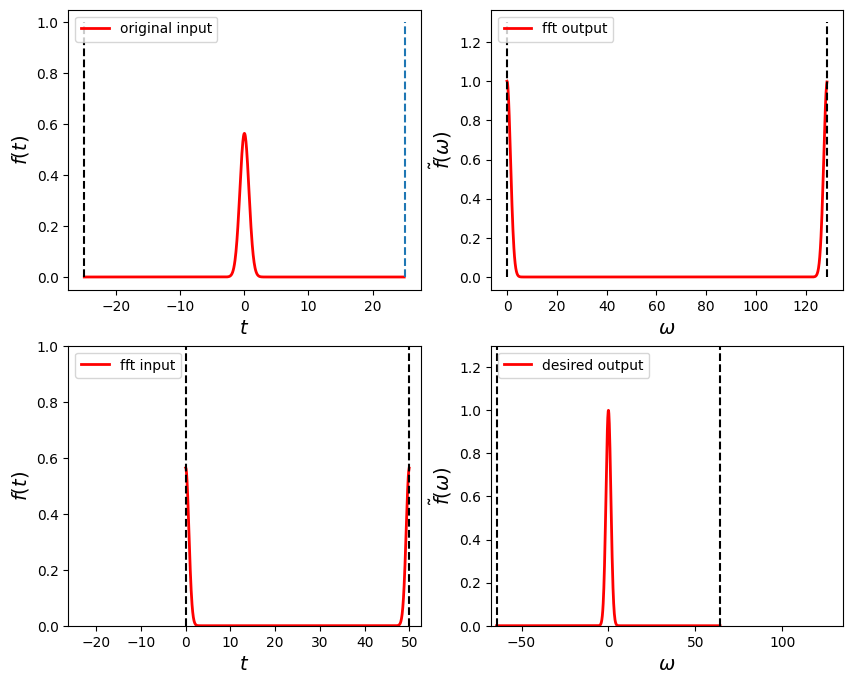

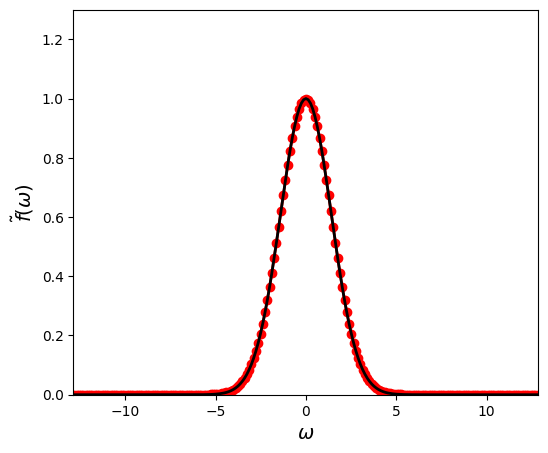

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# control parameters
N=1024

# Setting time domain
T=50.   # size of time domain
dt=T/N  # time interval
tmin=-T/2.
tmax=tmin+dt*(N-1)
t0=np.linspace(tmin,tmax,N)    # original time
t1=np.linspace(0.0,dt*(N-1),N) # fft ordered time

# setting frequency domain
W=2.0*np.pi*N/T # size of the frequency domain
dw=W/N          # frequency resolution
wmin=-W/2.0
wmax=wmin+dw*(N-1)
w0=np.linspace(wmin,wmax,N)     # frequency domain we want
w1=np.linspace(0.0,dw*(N-1),N)  # fft frequency domain

# original Gaussian function in time domain
f0=np.exp(-t0**2)/np.sqrt(np.pi)
# function in fft order
f1=np.fft.fftshift(f0)

# FFT from time to frequency domain in  ffto order
g1=np.fft.ifft(f1)*T  # do not forget to multiply T

# Get the normal frequenx=cy domain order
g0=np.fft.ifftshift(g1)

# analytic FT
g2=np.exp((-w0**2)/4.0)

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.plot(t0,f0,'-r',label=r'original input',linewidth=2)
plt.plot([-T/2,-T/2],[0,1],'--k')
plt.plot([T/2,T/2],[0,1],'--')
#plt.axis([-T/2*1.05, T*1.05, 0.0, 1.0])
plt.legend(loc=2)
plt.xlabel(r'$t$',fontsize=14)
plt.ylabel(r'$f(t)$',fontsize=14)

plt.subplot(2,2,3)
plt.plot(t1,f1,'-r',label='fft input',linewidth=2)
plt.plot([0,0],[0,1],'--k')
plt.plot([T,T],[0,1],'--k')
plt.axis([-T/2*1.05, T*1.05, 0.0, 1.0])
plt.legend(loc=2)
plt.xlabel(r'$t$',fontsize=14)
plt.ylabel(r'$f(t)$',fontsize=14)

plt.subplot(2,2,2)
plt.plot(w1,g1,'-r',label='fft output',linewidth=2)
plt.plot([0,0],[0,1.3],'--k')
plt.plot([W,W],[0,1.3],'--k')
#plt.axis([-W/2*1.05, W*1.05, 0.0, 1.3])
plt.legend(loc=2)
plt.xlabel(r'$\omega$',fontsize=14)
plt.ylabel(r'$\tilde{f}(\omega)$',fontsize=14)

plt.subplot(2,2,4)
plt.plot(w0,g0,'-r',label='desired output',linewidth=2)
plt.plot([-W/2,-W/2],[0,1.3],'--k')
plt.plot([W/2,W/2],[0,1.3],'--k')
plt.axis([-W/2*1.05, W*1.05, 0.0, 1.3])
plt.legend(loc=2)
plt.xlabel(r'$\omega$',fontsize=14)
plt.ylabel(r'$\tilde{f}(\omega)$',fontsize=14)
plt.show()

plt.figure(figsize=(6,5))
plt.plot(w0,g0,'-or',label='FFT',linewidth=2)
plt.plot(w0,g2,'-k',label='Exact',linewidth=2)
plt.axis([-W/2*0.2, W/2*0.2, 0.0, 1.3])
plt.xlabel(r'$\omega$',fontsize=14)
plt.ylabel(r'$\tilde{f}(\omega)$',fontsize=14)
plt.show()
